# Content-based recommandation

Here, we recommend items based on their similarity to another item that the user interacted with (likes, bought, viewed etc...). Similarity is calculated based on the items attributes. Attributes can be e.g., for a book:
- genre
- number of pages
- author
- year of release
- language
- etc...

In [113]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Create a table of dummy variables of genres

In [2]:
movies_df = pd.read_csv('./Data/MovieLens/ml-latest-small/movies.csv',index_col=0)
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [159]:
temp = movies_df.reset_index().set_index('title')['genres'].str.split('|').explode()
genres = pd.get_dummies(temp).groupby('title').sum()
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
'71 (2014),0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
'Round Midnight (1986),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
'Salem's Lot (2004),0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# Compute similarity

Similarity is computed based on Jaccard similarity

$J(A,B) = \frac{A \cap B}{A \cup B}$

Jaccard similarity can be computer using `sklearn`'s `jaccard_score` function. To compute all paris at once, use `scipy.spatial.distance.pdist` which returns the jaccard distance. The jaccard similarity = 1-jaccard_distance

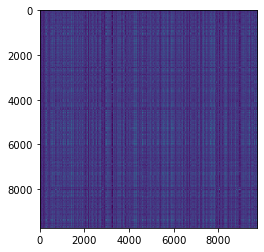

In [160]:
dist = 1.0 - pdist(genres, metric='jaccard')
sim_mat = pd.DataFrame(squareform(dist),index=genres.index, columns = genres.index)
plt.imshow(sim_mat)

In [161]:
sim_mat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.000000,0.125,0.200000,0.333333,0.200000,0.0,0.0,0.25,0.166667,0.000000,...,0.40,0.40,0.2,0.2,0.200000,0.400000,0.400000,0.400000,0.000000,0.000000
'Hellboy': The Seeds of Creation (2004),0.125000,0.000,0.000000,0.000000,0.000000,0.0,0.2,0.00,0.142857,0.285714,...,0.00,0.00,0.0,0.0,0.000000,0.142857,0.142857,0.142857,0.166667,0.166667
'Round Midnight (1986),0.200000,0.000,0.000000,0.200000,0.333333,0.0,0.0,0.50,0.250000,0.000000,...,0.25,0.25,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
'Salem's Lot (2004),0.333333,0.000,0.200000,0.000000,0.200000,0.0,0.0,0.25,0.166667,0.000000,...,0.40,0.75,0.5,0.5,0.200000,0.166667,0.166667,0.166667,0.000000,0.000000
'Til There Was You (1997),0.200000,0.000,0.333333,0.200000,0.000000,0.5,0.0,0.50,0.666667,0.000000,...,0.25,0.25,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000


# Find movies similar to a given one

In [199]:
movie = 'Jumanji (1995)'
similar_movies = pd.DataFrame(sim_mat.loc[movie].sort_values(ascending=False))
similar_movies.rename(columns={movie:'similarity'},inplace=True)
similar_movies.head(10)

,similarity
title,
Santa Claus: The Movie (1985),1.0
"Chronicles of Narnia: Prince Caspian, The (2008)",1.0
Alice Through the Looking Glass (2016),1.0
Alice in Wonderland (1933),1.0
Gulliver's Travels (1996),1.0
"NeverEnding Story II: The Next Chapter, The (1990)",1.0
Pan (2015),1.0
"NeverEnding Story III, The (1994)",1.0
"NeverEnding Story, The (1984)",1.0


# Keep only the most similar movies and sort by rating

First I create a Series with `title` as index and `rating` as feature. Then I use this series to map `title` to `rating` to add a `rating` column to my `similar_movies` DataFrame.

In [200]:
ratings_df = pd.read_csv("./Data/MovieLens/ml-latest-small/ratings.csv", index_col=0)
temp = ratings_df[['movieId','rating']].groupby('movieId').mean()
temp['title'] = movies_df.loc[temp.index,'title']
temp.set_index('title',inplace=True)
temp.head()

,rating
title,
Toy Story (1995),3.920930
Jumanji (1995),3.431818
Grumpier Old Men (1995),3.259615
Waiting to Exhale (1995),2.357143
Father of the Bride Part II (1995),3.071429


In [222]:
similar_movies['rating'] = similar_movies.index.map(dict(zip(temp.index,temp['rating'])))
similar_movies[similar_movies['similarity']>=0.9].sort_values(by='rating',ascending=False)

,similarity,rating
title,,
The Cave of the Golden Rose (1991),1.0,4.000000
Alice in Wonderland (1933),1.0,4.000000
"Water Horse: Legend of the Deep, The (2007)",1.0,4.000000
"Chronicles of Narnia: The Voyage of the Dawn Treader, The (2010)",1.0,3.857143
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),1.0,3.761682
"NeverEnding Story, The (1984)",1.0,3.581395
"Chronicles of Narnia: Prince Caspian, The (2008)",1.0,3.541667
"Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)",1.0,3.443548
"Indian in the Cupboard, The (1995)",1.0,3.235294
